In [44]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import NumPy under the abbreviation 'np'
import numpy as np

In [45]:
# Import the heart disease dataset and save it to a variable
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
# Create X (all columns except target)
X = heart_disease.drop('target', axis=1)

# Create y (only the target column)
y = heart_disease['target']

In [47]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [49]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()

In [50]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

In [52]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [53]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

1.0

In [54]:
# Evaluate the fitted model on the test set using the score() function
clf.score(X_test, y_test)

0.8360655737704918

### Experimenting with different classification models

The models we're going to try and compare are:

* LinearSVC
* KNeighborsClassifier (also known as K-Nearest Neighbors or KNN)
* SVC (also known as support vector classifier, a form of support vector machine)
* LogisticRegression (despite the name, this is actually a classifier)
* RandomForestClassifier (an ensemble method and what we used above)

We'll follow the same workflow we used above (except this time for multiple models):

1. Import a machine learning model
2. Get it ready
3. Fit it to the data and make predictions
4. Evaluate the fitted model

To see which model performs best, we'll do the following:

1. Instantiate each model in a dictionary
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on the test data
5. Check the results

In [55]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from  sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

In [56]:
# Setup np.random.seed to 42
np.random.seed(42)

# Instatiating the models to use in a dictionary
models = {'LinearSVC': LinearSVC(),
         'KNN': KNeighborsClassifier(),
         'SVC': SVC(),
         'LogisticRegression': LogisticRegression(),
         'RandomForestClassifier': RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

# Looping through models dictionary fitting and scoring the model
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = model.score(X_test, y_test)
    
results

/home/kiprotich/Desktop/ML-course/heart-disease-project/env/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/kiprotich/Desktop/ML-course/heart-disease-project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kiprotich/Desktop/ML-course/heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

{'LinearSVC': 0.8032786885245902,
 'KNN': 0.7213114754098361,
 'SVC': 0.7377049180327869,
 'LogisticRegression': 0.8032786885245902,
 'RandomForestClassifier': 0.819672131147541}

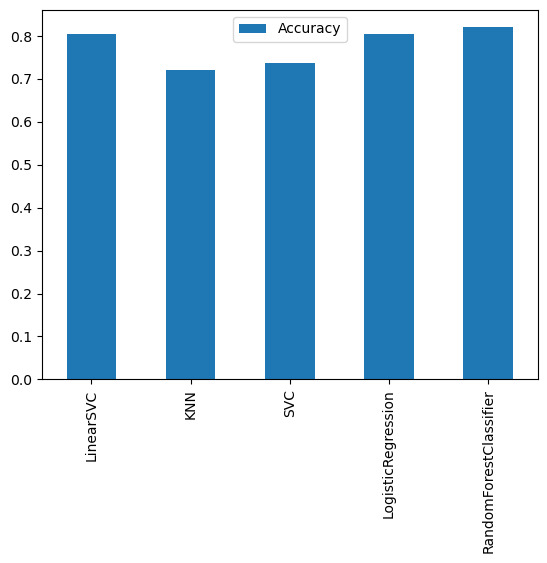

In [57]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=['Accuracy'])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar();

## Hyperparameter Tuning

In [58]:
# Different LogisticRegression hyperparameters
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

In [59]:
# Setup np.random.seed to 42
np.random.seed(42)

# Import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV


# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_log_reg = RandomizedSearchCV(estimator= LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=10,
                                verbose=True)

# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [60]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [61]:
# Score the instance of RandomizedSearchCV using the test data
rs_log_reg.score(X_test, y_test)

0.8032786885245902

In [62]:
results

{'LinearSVC': 0.8032786885245902,
 'KNN': 0.7213114754098361,
 'SVC': 0.7377049180327869,
 'LogisticRegression': 0.8032786885245902,
 'RandomForestClassifier': 0.819672131147541}

## Classifier Model Evaluation

We've tried to find the best hyperparameters on our model using RandomizedSearchCV and so far we've only been evaluating our model using the score() function which returns accuracy.

But when it comes to classification, you'll likely want to use a few more evaluation metrics, including:

* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* Recall - Proportion of true positives over total number of true positives and false positives. Higher recall leads to less false negatives.
* F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

In [63]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(solver='liblinear', C=0.23357214690901212)

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [64]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score

# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import RocCurveDisplay

In [65]:
# Make predictions on test data and save them
y_preds = clf.predict(X_test)

In [66]:
# Create a confusion matrix using the confusion_matrix function
confusion_matrix(y_test, y_preds)

array([[17,  7],
       [ 5, 32]])

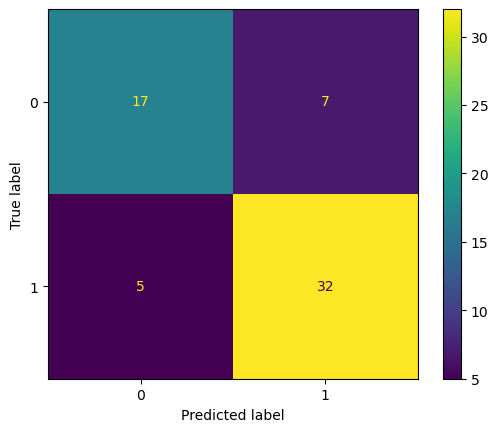

In [67]:
# Import metrics from sklearn
from sklearn import metrics

# Create a more visual confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_preds)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                                  display_labels = [0, 1])

confusion_matrix_display.plot();

In [68]:
# Create a classification report using the classification_report function
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.82      0.86      0.84        37

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



Challenge: Write down what each of the columns in this classification report are.

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

The classification report gives us a range of values for precision, recall and F1 score, time to find these metrics using Scikit-Learn functions.

In [69]:
# Find the precision score of the model using precision_score()
precision_score(y_test, y_preds)

0.8205128205128205

In [70]:
# Find the recall score
recall_score(y_test, y_preds)

0.8648648648648649

In [71]:
# Find the F1 score
f1_score(y_test, y_preds)

0.8421052631578947

Confusion matrix: done. Classification report: done. ROC (receiver operator characteristic) curve & AUC (area under curve) score: not done.

In a sentence, a Receiver Operating Characterisitc (ROC) curve is a plot of the true positive rate versus the false positive rate.

And the AUC score is the area behind the ROC curve.

Scikit-Learn provides a handy function for creating both of these called `RocCurveDisplay()`

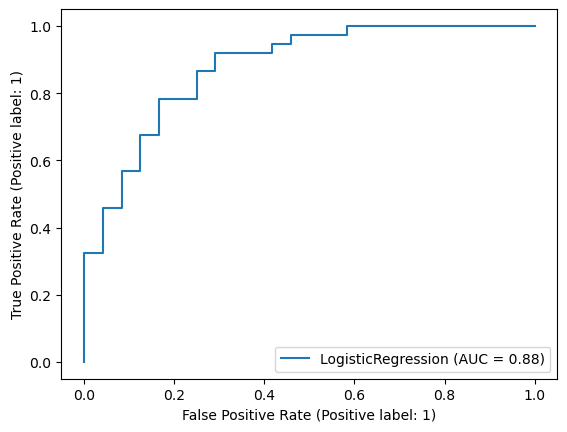

In [72]:
# Plot a ROC curve using our current machine learning model using RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test);

The thing to note here is all of these metrics have been calculated using a single training set and a single test set. Whilst this is okay, a more robust way is to calculate them using cross-validation.

We can calculate various evaluation metrics using cross-validation using Scikit-Learn's `cross_val_score()` function along with the `scoring` parameter.

In [73]:
# Import cross_val_score from sklearn's model_selection module
from sklearn.model_selection import cross_val_score

Taking the mean of the returned values from cross_val_score gives a cross-validated version of the scoring metric.

In [74]:
# Fingding the crosss-validated accuracy
cross_val_acc = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       scoring='accuracy',
                                       cv=5))

cross_val_acc

0.8479781420765027

In [75]:
# Find the cross-validated precision
cross_val_precision = np.mean(cross_val_score(clf,
                                             X,
                                             y,
                                             scoring='precision',
                                             cv=5))

cross_val_precision

0.8215873015873015

In [76]:
# Find the cross-validated recall
cross_val_recall = np.mean(cross_val_score(clf,
                                          X,
                                          y,
                                          scoring='recall',
                                          cv=5))

cross_val_recall

0.9272727272727274

In [77]:
# Find the cross-validated F1 score
cross_val_f1 = np.mean(cross_val_score(clf,
                                      X,
                                      y,
                                      scoring='f1',
                                      cv=5))

cross_val_f1

0.8705403543192143

## Exporting and importing a trained model
Once you've trained a model, you may want to export it and save it to file so you can share it or use it elsewhere.

One method of exporting and importing models is using the joblib library.

In Scikit-Learn, exporting and importing a trained model is known as **model persistence**.

In [78]:
# Import the dump and load functions from the joblib library
from joblib import dump, load

In [79]:
# Use the dump function to export the trained model to file
dump(clf, filename='clf_random_forest_model.joblib')

['clf_random_forest_model.joblib']

In [80]:
# Use the load function to import the trained model you just exported\
clf_random_forest_model = load('clf_random_forest_model.joblib')

# Evaluate the loaded trained model on the test data
clf_random_forest_model.score(X_test, y_test)

0.8032786885245902

## Scikit-Learn Regression Practice

In [81]:
# Read in the car sales data
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

# View the first 5 rows of the car sales data
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [82]:
# Get information about the car sales DataFrame
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [83]:
# Find number of missing values in each column
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [84]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [85]:
# Find the datatypes of each column of car_sales
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [86]:
# EXAMPLE: This doesn't work because our car_sales data isn't all numerical
from sklearn.ensemble import RandomForestRegressor
car_sales_X, car_sales_y = car_sales.drop("Price", axis=1), car_sales.Price
rf_regressor = RandomForestRegressor().fit(car_sales_X, car_sales_y)

ValueError: could not convert string to float: 'Honda'

In [87]:
# Remove rows with no labels (NaN's in the Price column)
car_sales.dropna(subset=['Price'], inplace=True)

In [88]:
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

## Building a pipeline
Since our `car_sales` data has missing numerical values as well as the data isn't all numerical, we'll have to fix these things before we can fit a machine learning model on it.

There are ways we could do this with pandas but since we're practicing Scikit-Learn, we'll see how we might do it with the `Pipeline` class.

Because we're modifying columns in our dataframe (filling missing values, converting non-numerical data to numbers) we'll need the `ColumnTransformer`, `SimpleImputer` and `OneHotEncoder` classes as well.

Finally, because we'll need to split our data into training and test sets, we'll import `train_test_split` as well.

In [89]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing  import OneHotEncoder

# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

Now we've got the necessary tools we need to create our preprocessing `Pipeline` which fills missing values along with turning all non-numerical data into numbers.

Let's start with the categorical features.

In [90]:
# Define different categorical features 
categorical_features = ["Make", "Colour"]

# Create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    # SimpleImputer strategy to "constant" and fill value to "missing"
    ("imputer", SimpleImputer(strategy='constant', fill_value='missing')),
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

It would be safe to treat `Doors` as a categorical feature as well, however since we know the vast majority of cars have 4 doors, we'll impute the missing `Doors` values as 4.

In [91]:
# Define Doors features
door_feature = ["Doors"]

# Create Doors transformer Pipeline
door_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to 4
    ("imputer", SimpleImputer(strategy='constant', fill_value=4))])

Now onto the numeric features. In this case, the only numeric feature is the `Odometer (KM)` column. Let's fill its missing values with the median.

In [92]:
# Define numeric features (only the Odometer (KM) column)
numeric_features = ["Odometer (KM)"]

# Create numeric transformer Pipeline
numeric_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to fill missing values with the "Median"
    ("imputer", SimpleImputer(strategy='median'))])

Time to put all of our individual transformer `Pipeline`'s into a single `ColumnTransformer` instance.

In [93]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        # Use the categorical_transformer to transform the categorical_features
        ("cat", categorical_transformer, categorical_features),
        # Use the door_transformer to transform the door_feature
        ("door", door_transformer, door_feature),
        # Use the numeric_transformer to transform the numeric_features
        ("num", numeric_transformer, numeric_features)])

Boom! Now our `preprocessor` is ready, time to import some regression models to try out.

Comparing our data to the Scikit-Learn machine learning map, we can see there's a handful of different regression models we can try.

* RidgeRegression
* SVR(kernel="linear") - short for Support Vector Regressor, a form form of support vector machine.
* SVR(kernel="rbf") - short for Support Vector Regressor, a form of support vector machine.
* RandomForestRegressor - the regression version of RandomForestClassifier.

In [94]:
# Import Ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

# Import SVR from sklearn's svm module
from sklearn.svm import SVR

# Import RandomForestRegressor from sklearn's ensemble module
from sklearn.ensemble import RandomForestRegressor

To test them all, we'll create a dictionary of regression models and an empty dictionary for regression model results.

In [95]:
# Create dictionary of model instances
regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel='linear'),
                     "SVR_rbf": SVR(kernel='rbf'),
                     "RandomForestRegressor": RandomForestRegressor()}

# Create an empty dictionary for the regression results
regression_results = {}

In [96]:
# Create car sales X data (every column of car_sales except Price)
car_sales_X = car_sales.drop('Price', axis=1)

# Create car sales y data (the Price column of car_sales)
car_sales_y = car_sales['Price']

In [97]:
# Use train_test_split to split the car_sales_X and car_sales_y data into training and test sets.
# Give the test set 20% of the data using the test_size parameter.
# For reproducibility set the random_state parameter to 42.
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                    car_sales_y,
                                                                    test_size=0.2,
                                                                    random_state=42)

# Check the shapes of the training and test datasets
car_X_train.shape, car_X_test.shape, car_y_train.shape, car_y_test.shape

((760, 4), (190, 4), (760,), (190,))

Alright, our data is split into training and test sets, time to build a small loop which is going to:

1. Go through our `regression_models` dictionary
2. reate a `Pipeline` which contains our `preprocesso`r as well as one of the models in the dictionary
3. Fits the `Pipeline` to the car sales training data
4. Evaluates the target model on the car sales test data and appends the results to our `regression_results` dictionary

In [98]:
# Loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    
    # Create a model Pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    
    # Fit the model Pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train, car_y_train)
    
    # Score the model Pipeline on the test data appending the model_name to the 
    # results dictionary
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_X_test, 
                                                          car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


Our regression models have been fit, let's see how they did!

In [99]:
# Check the results of each regression model by printing the regression_results dictionary
regression_results

{'Ridge': 0.25402611057943925,
 'SVR_linear': -0.489452821008145,
 'SVR_rbf': 0.0018546241516633755,
 'RandomForestRegressor': 0.22397286192178034}

Since we've fitted some models but only compared them via the default metric contained in the `score()` method (R^2 score or coefficient of determination), let's take the `RidgeRegression` model and evaluate it with a few other regression metrics.

Specifically, let's find:

1. **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Scikit-Learn has a few classes built-in which are going to help us with these, namely, `mean_absolute_error`, `mean_squared_error` and `r2_score`.

In [100]:
# Import mean_absolute_error from sklearn's metrics module
from sklearn.metrics import mean_absolute_error

# Import mean_squared_error from sklearn's metrics module
from sklearn.metrics import mean_squared_error

# Import r2_score from sklearn's metrics module
from sklearn.metrics import r2_score

All the evaluation metrics we're concerned with compare a model's predictions with the ground truth labels. Knowing this, we'll have to make some predictions.

Let's create a `Pipeline` with the `preprocessor` and a `Ridge()` model, fit it on the car sales training data and then make predictions on the car sales test data.

In [101]:
# Create RidgeRegression Pipeline with preprocessor as the "preprocessor" and Ridge() as the "model".
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])

# Fit the RidgeRegression Pipeline to the car sales training data
ridge_pipeline.fit(car_X_train, car_y_train)

# Make predictions on the car sales test data using the RidgeRegression Pipeline
car_y_preds = ridge_pipeline.predict(car_X_test)

# View the first 50 predictions
car_y_preds[:50]

array([18514.480873  , 22204.86580267, 11045.72092225,  6891.87687957,
        8793.93970278, 10926.96786577, 15267.76229871, 13834.80312146,
       20207.44377898, 14412.59968701,  6216.01228306, 16543.06707068,
       11783.69374936, 13492.13284255, 14321.17899086, 16425.45131776,
       15999.88230172,  9925.04252351, 11576.64865889, 11580.55130633,
       10647.22402588, 13113.54464064, 17874.90033257, 23447.29246732,
       11797.33019118, 14481.85336505, 18430.527126  , 14680.33044208,
       20585.63901269, 19953.91395769, 18163.1170151 , 22366.43390174,
       12435.69707467, 14265.25495748, 18351.62656383, 19564.58267503,
       12213.05747919, 12479.20772529, 18677.93478691, 11284.89072638,
       15278.54001605, 17378.81425165, 19247.77623181, 17343.90692672,
       15048.12797569, 12724.44477165, 12389.86021752,  8475.63778401,
       15255.49324105, 18602.79970861])

Nice! Now we've got some predictions, time to evaluate them. We'll find the mean squared error (MSE), mean absolute error (MAE) and R^2 score (coefficient of determination) of our model.

In [102]:
car_y_test.shape, car_y_preds.shape

((190,), (190,))

In [103]:
# Find the MAE by comparing the car sales test labels to the car sales predictions
mae = mean_absolute_error(car_y_test, car_y_preds)
# Return the MAE
mae

5713.8215208551555

In [104]:
# Find the MSE by comparing the car sales test labels to the car sales predictions
mse = mean_squared_error(car_y_test, car_y_preds)
# Return the MSE
mse

49950182.633374564

In [105]:
# Find the R^2 score by comparing the car sales test labels to the car sales predictions
r2 = r2_score(car_y_test, car_y_preds)
# Return the R^2 score
r2

0.25402611057943925

In [106]:
car_sales.to_csv('data/car-sales-prac-export.csv')